## 1. Scipy:
- We have the min and max temperatures in a city In India for each months of the year.
- We would like to find a function to describe this and show it graphically, the dataset given below.
- Task:
- 1. fitting it to the periodic function
- 2. plot the fit

- Data
- Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
- Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18
- Expected Output:

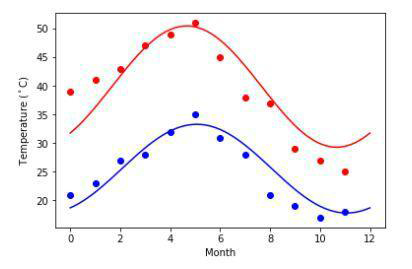

In [3]:
!pip install scipy

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special
%matplotlib inline

In [13]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_max

array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])

In [10]:
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
temp_min

array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [11]:
months = np.arange(12)
months

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Text(0, 0.5, 'Temperature')

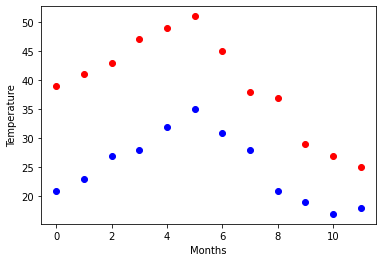

In [16]:
plt.plot(months,temp_max,'ro')
plt.plot(months,temp_min,'bo')
plt.xlabel('Months')
plt.ylabel('Temperature')

In [17]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [60, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

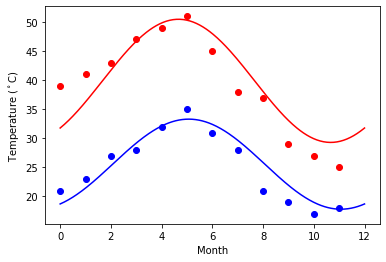

In [18]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

## 2. Matplotlib:
#### This assignment is for visualization using matplotlib:
- data to use:
- url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

#### Charts to plot:
- Create a pie chart presenting the male/female proportion
- Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


- Create a pie chart presenting the male/female proportion

In [69]:
gender_count = titanic['sex'].value_counts()
gender_count
##print(type(gender_count))

male      843
female    466
Name: sex, dtype: int64

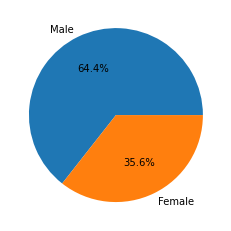

In [72]:
plt.pie(gender_count,labels=['Male','Female'],data=titanic,autopct='%1.1f%%')
plt.show()

- Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [54]:
age = np.array(titanic['age'])
age

array([29.    ,  0.9167,  2.    , ..., 27.    , 29.    ,     nan])

In [55]:
fare = np.array(titanic['fare'])
fare

array([211.3375, 151.55  , 151.55  , ...,   7.225 ,   7.875 ,      nan])

In [44]:
titanic[['fare','age']]

,fare,age
0,211.3375,29.0000
1,151.5500,0.9167
2,151.5500,2.0000
3,151.5500,30.0000
4,151.5500,25.0000
...,...,...
1305,14.4542,NaN
1306,7.2250,26.5000
1307,7.2250,27.0000
1308,7.8750,29.0000


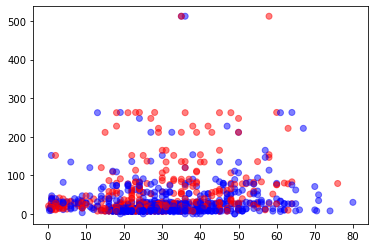

In [82]:
titanic = titanic.dropna(subset=['sex'])

mapping = {'male' : 'blue', 'female' : 'red'}
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=titanic['sex'].map(mapping))
plt.show()